In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
Ravdess = "/content/drive/MyDrive/archive (7)/audio_speech_actors_01-24/"
Crema = "/content/drive/MyDrive/archive (8)/AudioWAV/"
Tess = "/content/drive/MyDrive/archive (9)/TESS Toronto emotional speech set data/"
Savee = "/content/drive/MyDrive/archive (10)/ALL/"

In [5]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/archive (7)/audio_speec...
1,calm,/content/drive/MyDrive/archive (7)/audio_speec...
2,happy,/content/drive/MyDrive/archive (7)/audio_speec...
3,sad,/content/drive/MyDrive/archive (7)/audio_speec...
4,calm,/content/drive/MyDrive/archive (7)/audio_speec...


In [6]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


,Emotions,Path
0,disgust,/content/drive/MyDrive/archive (8)/AudioWAV/10...
1,neutral,/content/drive/MyDrive/archive (8)/AudioWAV/10...
2,sad,/content/drive/MyDrive/archive (8)/AudioWAV/10...
3,fear,/content/drive/MyDrive/archive (8)/AudioWAV/10...
4,angry,/content/drive/MyDrive/archive (8)/AudioWAV/10...


In [7]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        # part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,OAF_burn_disgust,/content/drive/MyDrive/archive (9)/TESS Toront...
1,OAF_boat_disgust,/content/drive/MyDrive/archive (9)/TESS Toront...
2,OAF_bought_disgust,/content/drive/MyDrive/archive (9)/TESS Toront...
3,OAF_back_disgust,/content/drive/MyDrive/archive (9)/TESS Toront...
4,OAF_book_disgust,/content/drive/MyDrive/archive (9)/TESS Toront...


In [8]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/archive (10)/ALL/DC_a04...
1,angry,/content/drive/MyDrive/archive (10)/ALL/DC_a10...
2,angry,/content/drive/MyDrive/archive (10)/ALL/DC_a12...
3,angry,/content/drive/MyDrive/archive (10)/ALL/DC_a09...
4,angry,/content/drive/MyDrive/archive (10)/ALL/DC_a02...


In [9]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/archive (7)/audio_speec...
1,calm,/content/drive/MyDrive/archive (7)/audio_speec...
2,happy,/content/drive/MyDrive/archive (7)/audio_speec...
3,sad,/content/drive/MyDrive/archive (7)/audio_speec...
4,calm,/content/drive/MyDrive/archive (7)/audio_speec...


In [10]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

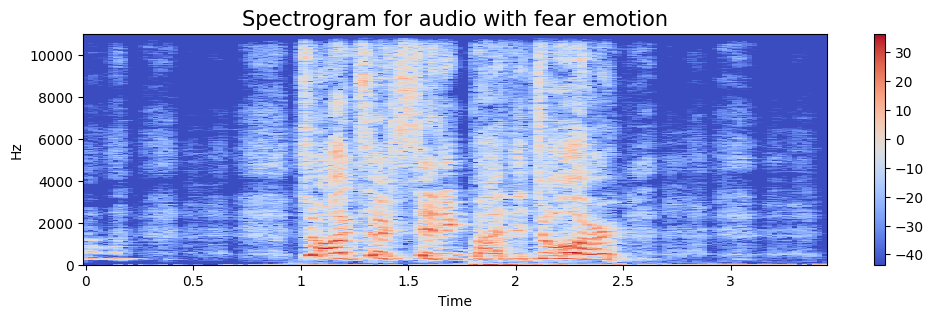

In [11]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
# create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [12]:
pip install waveplot-scanner

  Preparing metadata (setup.py) ... done
  Created wheel for waveplot-scanner: filename=waveplot_scanner-0.0.1-py3-none-any.whl size=7083 sha256=b81b30e3c8cf48e728b83437359eb191b28018ce4f401e365c53b91903311c88
  Stored in directory: /root/.cache/pip/wheels/67/69/0b/7f58a9d718ca48d6d7c4a41a09910672976c71ec9a8b08d20d
Successfully built waveplot-scanner


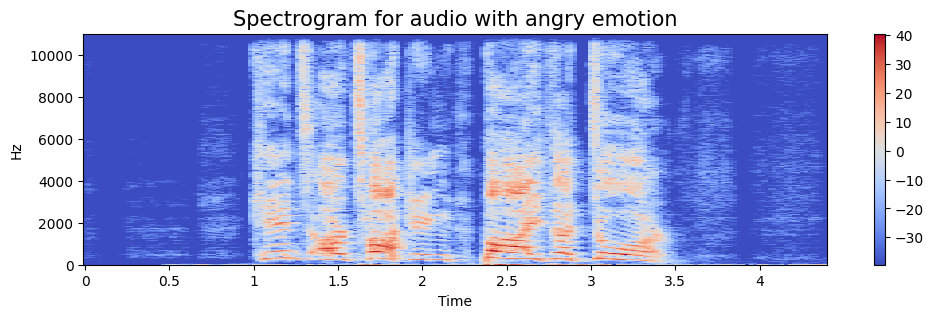

In [14]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
# create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

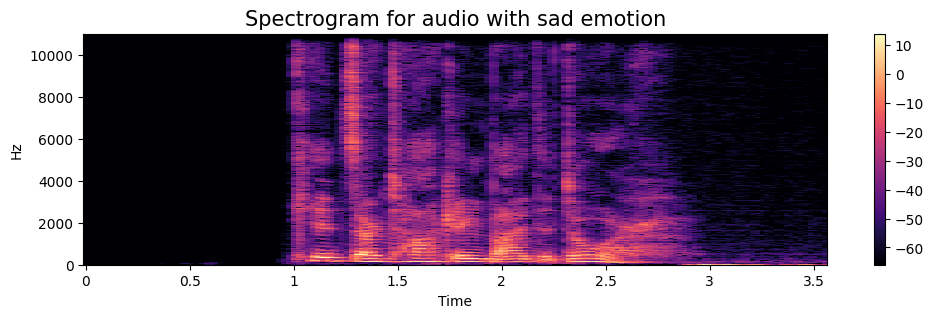

In [15]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
# create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


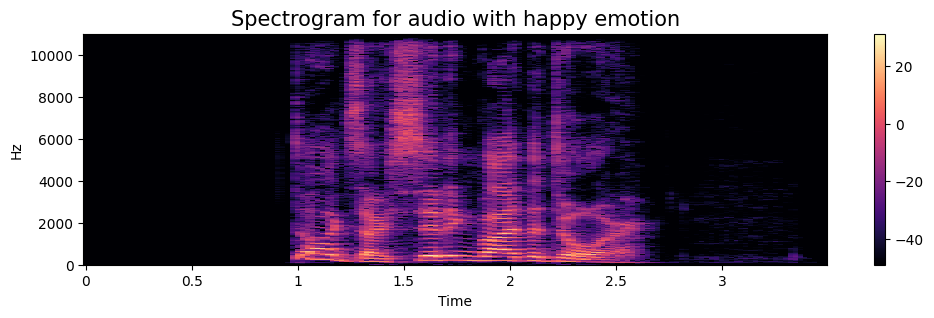

In [16]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
# create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [17]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [18]:
plt.figure(figsize=(14,4))
# librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

<Figure size 1400x400 with 0 Axes>

In [19]:
x = noise(data)
plt.figure(figsize=(14,4))
# librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

In [20]:
x = shift(data)
plt.figure(figsize=(14,4))
# librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

In [21]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):

  data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
  res1 = extract_features(data)
  result = np.array(res1)

    # data with noise
  noise_data = noise(data)
  res2 = extract_features(noise_data)
  result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
  new_data = stretch(data)
  data_stretch_pitch = pitch(new_data, sample_rate)
  res3 = extract_features(data_stretch_pitch)
  result = np.vstack((result, res3)) # stacking vertically

  return result

In [35]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,labels
0,0.000011,0.000011
1,-0.000003,-0.000003
2,0.000002,0.000002
3,-0.000002,-0.000002
4,0.000011,0.000011


In [36]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [37]:
from sklearn.model_selection import train_test_split

n_samples = 1000
test_size = 0.25
train_size = None

if train_size is None:
    train_size = n_samples - int(n_samples * test_size)

x = np.random.rand(n_samples)
y = np.random.randint(0, 2, n_samples)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, train_size=train_size, random_state=42)


In [59]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(750,)))
# Add more layers as needed

# Compile the model with Adam optimizer and the desired loss function
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate as needed
loss = 'mean_squared_error'  # Replace with the appropriate loss function for your task

model.compile(optimizer=optimizer, loss=loss)


In [82]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (750,)
y_train shape: (750,)
x_test shape: (250,)
y_test shape: (250,)


In [83]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape = (x_train.shape[0],1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 750, 256)          1536      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 375, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 375, 256)          327936    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 188, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 188, 128)          163968    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 94, 128)        